In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [44]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [45]:
lm = LinearRegression()

In [46]:
x = df[['highway-mpg']]
y = df['price']

In [47]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_hat = lm.predict(x)

In [49]:
lm.intercept_

38423.3058581574

In [50]:
lm.coef_

array([-821.73337832])

In [51]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [52]:
lm.fit(z, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_hat2 = lm.predict(z)

In [54]:
lm.intercept_

-15806.624626329205

In [55]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [56]:
pre_data = pd.DataFrame(y_hat2)
pre_data.head()

,0
0,13699.111612
1,13699.111612
2,19051.654702
3,10620.361930
4,15521.314202


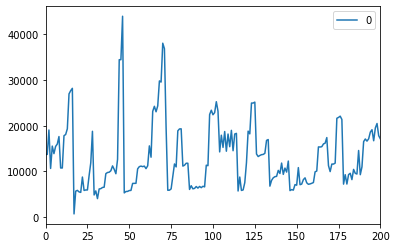

In [57]:
pre_data.plot()

(0, 48272.830010240345)

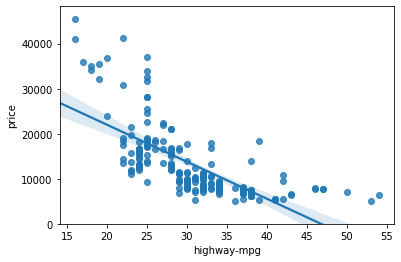

In [58]:
sns.regplot('highway-mpg', 'price', df)
plt.ylim(0,)

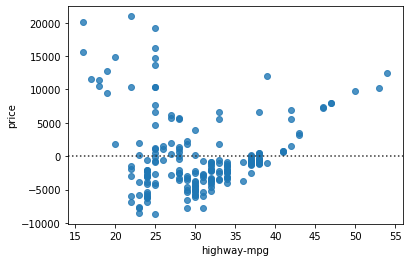

In [59]:
sns.residplot(df['highway-mpg'], df['price'])

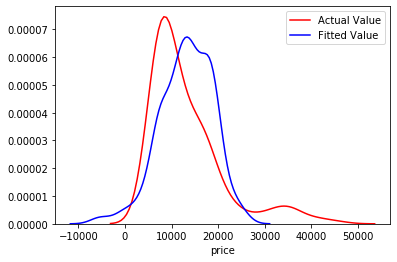

In [60]:
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_hat, hist=False, color='b', label='Fitted Value', ax=ax1)

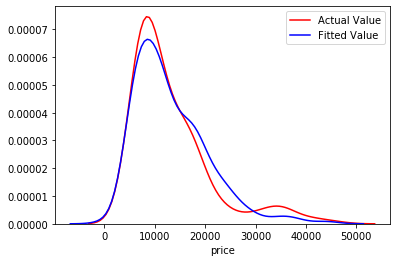

In [61]:
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_hat2, hist=False, color='b', label='Fitted Value', ax=ax1)

In [62]:
pr = PolynomialFeatures(degree=2)
x_polly = pr.fit_transform(df[['horsepower', 'curb-weight']])

In [63]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]
pipe = Pipeline(input)

In [64]:
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df['price'])
yhat = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

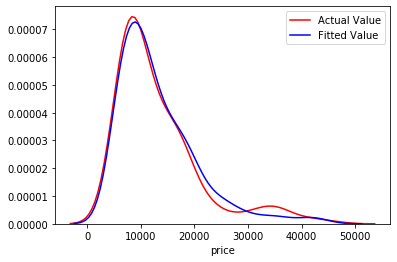

In [65]:
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(yhat, hist=False, color='b', label='Fitted Value', ax=ax1)

In [66]:
mean_squared_error(df['price'],y_hat)

31635042.944639888

In [67]:
x_data = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
x_train, x_test, y_train, y_test = train_test_split(x_data, df['price'], test_size=0.3, random_state=0)

In [68]:
model = LinearRegression()

In [69]:
model_fit = model.fit(x_train, y_train)
model_predict = model.predict(x_train)

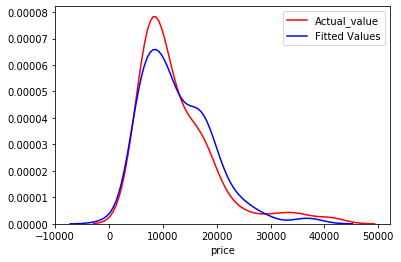

In [70]:
ax = sns.distplot(y_train, hist=False, color='r', label='Actual_value')
sns.distplot(model_predict, hist=False, color='b', label='Fitted Values', ax=ax)

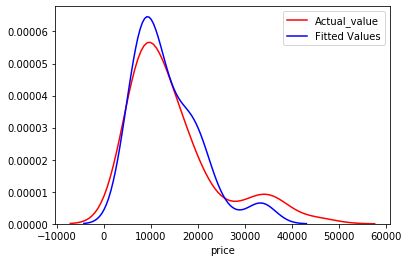

In [71]:
model_predict1 = model.predict(x_test)
ax = sns.distplot(y_test, hist=False, color='r', label='Actual_value')
sns.distplot(model_predict1, hist=False, color='b', label='Fitted Values', ax=ax)

In [72]:
scores = cross_val_score(model, x_data, df['price'], cv=3)
np.mean(scores)

0.6943481629076399

In [73]:
scores = cross_val_predict(model, x_data, df['price'], cv=3)
scores

array([12770.54431466, 12770.54431466, 18135.85242174,  9586.87544881,
       14158.06332515, 12994.26200137, 14313.46016225, 14744.05896847,
       15626.63669334,  9554.68904716,  9554.68904716, 17618.94579246,
       17834.24519557, 18654.92462791, 26732.49619606, 27319.67638636,
       27599.30281012,   979.51786474,  5586.81700048,  5723.82571155,
        5289.98388532,  4975.44828308,  7592.85623673,  5331.67093186,
        5417.7906931 ,  5417.7906931 ,  7839.47191666, 11086.82893294,
       17879.40784765,  5753.84007331,  5346.00357503,  3686.39362483,
        5400.28145888,  5462.91401251,  5674.29888102,  5729.10236545,
        8853.16710966,  9060.63744357,  9119.3554626 ,  9385.54381553,
        9937.65790133,  9531.40766059,  8556.16548638, 11535.2529517 ,
       34643.61367546, 34643.61367546, 45332.70943799,  4403.23367866,
        5176.29542991,  5195.86810292,  5352.449487  ,  5372.02216001,
        4804.76380093,  4804.76380093,  4824.33647394,  7958.01142587,
      

In [74]:
rsqur = []

order = [1,2,3,4]

for i in order:
    pr = PolynomialFeatures()
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    model.fit(x_train_pr, y_train)
    rsqur.append(model.score(x_test_pr, y_test))

In [75]:
rsqur

[0.6970750162486514,
 0.6970750162486514,
 0.6970750162486514,
 0.6970750162486514]